In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Create simple CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5370 - accuracy: 0.4395 - val_loss: 1.2714 - val_accuracy: 0.5406
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1682 - accuracy: 0.5865 - val_loss: 1.1637 - val_accuracy: 0.5808
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0164 - accuracy: 0.6424 - val_loss: 0.9976 - val_accuracy: 0.6495
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9220 - accuracy: 0.6752 - val_loss: 1.0153 - val_accuracy: 0.6473
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8463 - accuracy: 0.7036 - val_loss: 0.9205 - val_accuracy: 0.6763
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7857 - accuracy: 0.7238 - val_loss: 0.9121 - val_accuracy: 0.6859
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7409 - accuracy: 0.7420 - val_loss: 0.9047 -

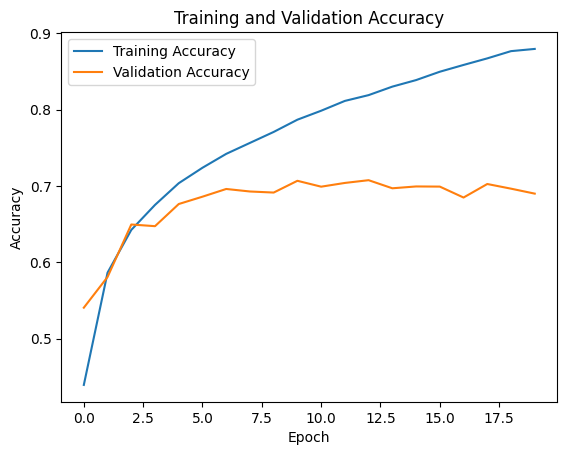

In [3]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
